# Assessment Task- Fetching and Analyzing Top 50 Live Cryptocurrency Data Objective


In [1]:
# Importing Necessary Libraries

import pandas as pd
import requests
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import openpyxl
import time
from openpyxl import Workbook
import os

## Objective:
The goal of this assessment is to fetch live cryptocurrency data for the top 50 cryptocurrencies, analyze it, and present the data in a live-updating Excel sheet. The Excel sheet should continuously update with the latest cryptocurrency prices.

##### To complete the task, follow these step-by-step

## Step 1: Fetch Live Data

In [2]:
# CoinGecko API endpoint for fetching top 50 cryptocurrencies
url = "https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=50&page=1&sparkline=false"

# Fetch data from CoinGecko API
response = requests.get(url)
data = response.json()

# Extract required fields from the fetched data
cryptocurrencies = []
for crypto in data:
    cryptocurrency = {
        'Cryptocurrency Name': crypto['name'],
        'Symbol': crypto['symbol'],
        'Current Price (in USD)': crypto['current_price'],
        'Market Capitalization': crypto['market_cap'],
        '24-hour Trading Volume': crypto['total_volume'],
        'Price Change (24-hour, percentage)': crypto['price_change_percentage_24h']
    }
    cryptocurrencies.append(cryptocurrency)

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(cryptocurrencies)

# Display the DataFrame
df.head()

,Cryptocurrency Name,Symbol,Current Price (in USD),Market Capitalization,24-hour Trading Volume,"Price Change (24-hour, percentage)"
0,Bitcoin,btc,80880.000,1599251956150,74844885036,5.92762
1,Ethereum,eth,3226.380,388164655449,42569896639,6.02656
2,Tether,usdt,1.001,123243625861,87165692694,0.04980
3,Solana,sol,213.650,100730014502,8497238867,7.67036
4,BNB,bnb,637.120,93027707330,2115328150,3.00526


**Output Interpretation:**
The output shows the first five rows of the DataFrame with the following columns:
- **Cryptocurrency Name:** The name of the cryptocurrency.
- **Symbol:** The symbol of the cryptocurrency.
- **Current Price (in USD):** The current price of the cryptocurrency in USD.
- **Market Capitalization:** The market capitalization of the cryptocurrency.
- **24-hour Trading Volume:** The trading volume of the cryptocurrency over the past 24 hours.
- **Price Change (24-hour, percentage):** The percentage change in price over the past 24 hours.

**For example, the first row shows:**
- **Cryptocurrency Name:** Bitcoin
- **Symbol:** BTC
- **Current Price (in USD):** 79395.000
- **Market Capitalization:** 1570691921732
- **24-hour Trading Volume:** 59811358001
- **Price Change (24-hour, percentage):** 3.94762

In [3]:
# Data Overview
print("Data Shape:", df.shape)
print("\nData Info:")
print(df.info())

Data Shape: (50, 6)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cryptocurrency Name                 50 non-null     object 
 1   Symbol                              50 non-null     object 
 2   Current Price (in USD)              50 non-null     float64
 3   Market Capitalization               50 non-null     int64  
 4   24-hour Trading Volume              50 non-null     int64  
 5   Price Change (24-hour, percentage)  50 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB
None



Missing Values:
Cryptocurrency Name                   0
Symbol                                0
Current Price (in USD)                0
Market Capitalization                 0
24-hour Trading Volume                0
Price Change (24-hour, percentage)    0
dtype: int64


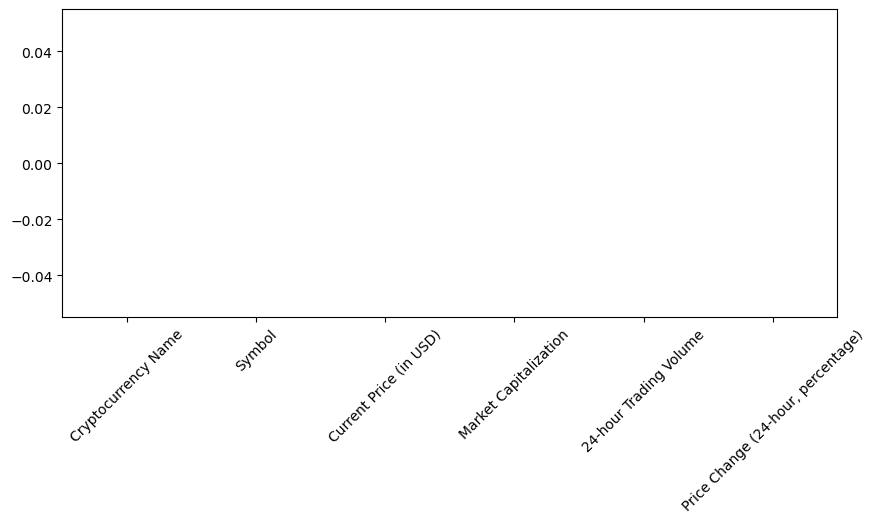

In [4]:
# Data Cleaning
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize missing data
df.isna().sum().plot(kind='bar',figsize=(10, 4))
plt.tick_params(axis='x', rotation=45)
plt.show()

In [5]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")


Number of Duplicate Rows: 0


## Step 2: Data Analysis


###  Identifying the top 5 cryptocurrencies by market cap

In [6]:
# Sort by Market Capitalization in descending order
df_sorted = df.sort_values(by='Market Capitalization', ascending=False)

# Select the top 5 cryptocurrencies
top_5 = df_sorted.head(5)
top_5

,Cryptocurrency Name,Symbol,Current Price (in USD),Market Capitalization,24-hour Trading Volume,"Price Change (24-hour, percentage)"
0,Bitcoin,btc,80880.000,1599251956150,74844885036,5.92762
1,Ethereum,eth,3226.380,388164655449,42569896639,6.02656
2,Tether,usdt,1.001,123243625861,87165692694,0.04980
3,Solana,sol,213.650,100730014502,8497238867,7.67036
4,BNB,bnb,637.120,93027707330,2115328150,3.00526


- **Market Capitalization:** Market capitalization is a key indicator of a cryptocurrency's size and dominance in the market. It is calculated by multiplying the current price by the total supply of the cryptocurrency.

- **Trading Volume:** High trading volume indicates strong market activity and liquidity, which is important for investors looking to buy or sell large amounts of a cryptocurrency.

- **Price Change:** The 24-hour price change percentage provides insight into the short-term market trend of a cryptocurrency. Positive values indicate a bullish trend, while negative values indicate a bearish trend.

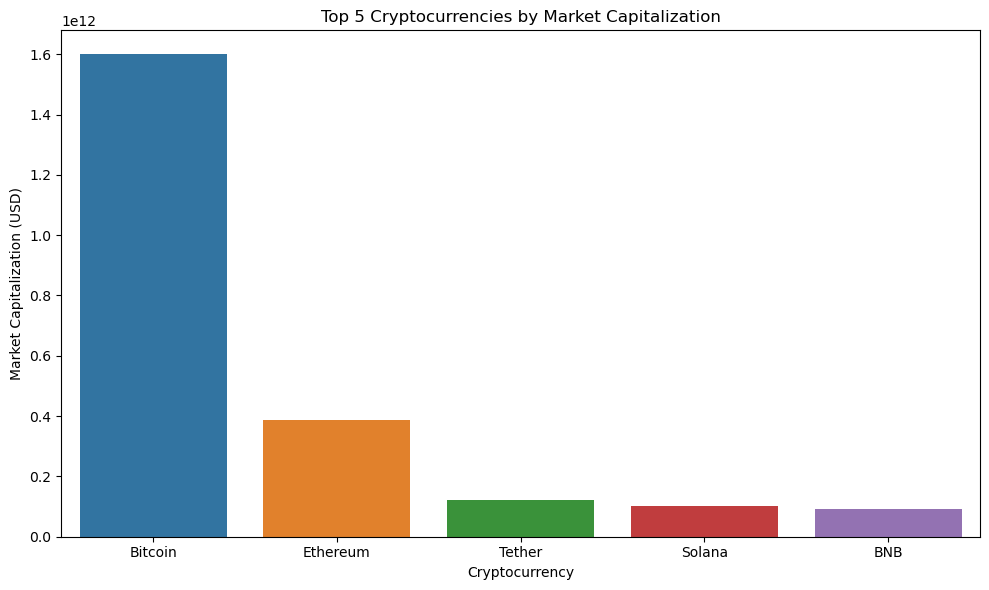

In [7]:
# Plot top 5 market capitalization
plt.figure(figsize=(10, 6))
sns.barplot(x='Cryptocurrency Name', y='Market Capitalization', data=top_5)
plt.xlabel('Cryptocurrency')
plt.ylabel('Market Capitalization (USD)')
plt.title('Top 5 Cryptocurrencies by Market Capitalization')
plt.tight_layout()
plt.show()

**This bar chart shows the top 5 cryptocurrencies by market capitalization.**

- Bitcoin has the largest market capitalization at over 1.5 trillion USD.
- Ethereum has the second largest market capitalization, around 400 billion USD.
- The remaining top 5 cryptocurrencies have market capitalizations of around 100 billion USD or less.

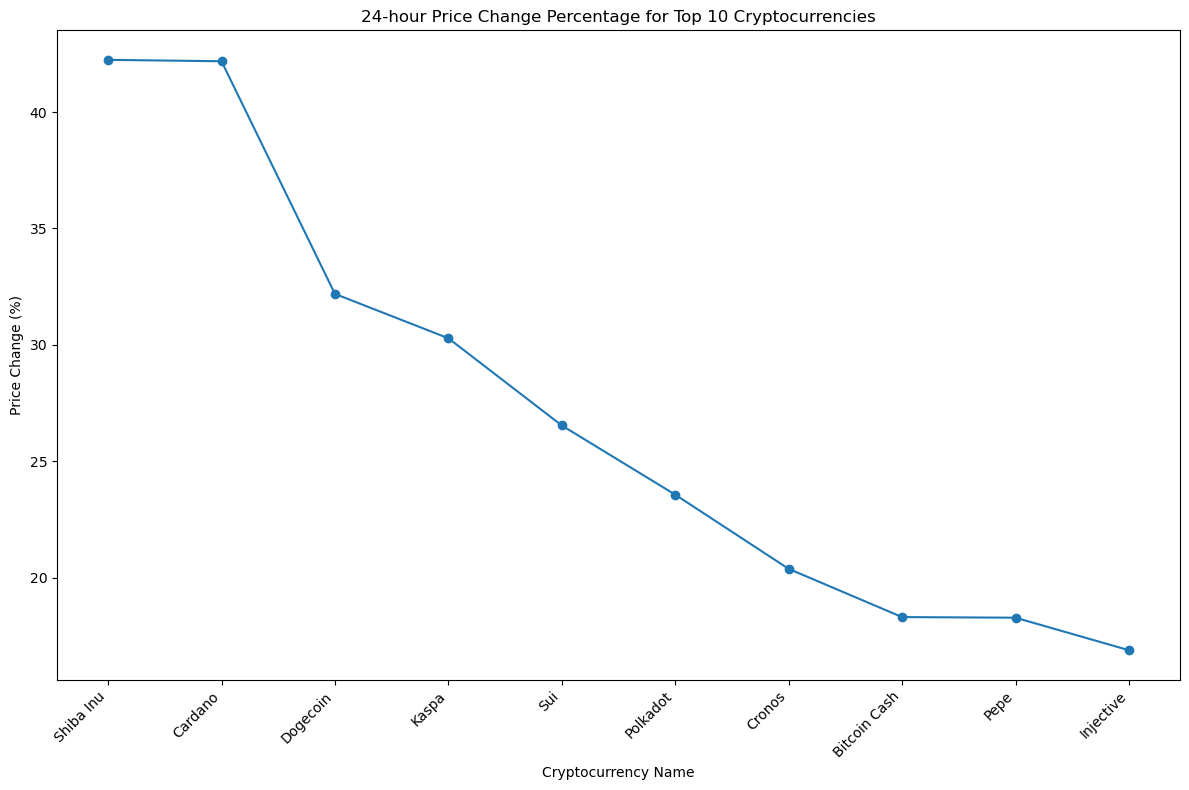

In [8]:
# Get top 10 cryptocurrencies by Price Change
top_10_price_change = df.nlargest(10, 'Price Change (24-hour, percentage)')

# Create a trend graph for price changes
plt.figure(figsize=(12, 8))
plt.plot(top_10_price_change['Cryptocurrency Name'], top_10_price_change['Price Change (24-hour, percentage)'], marker='o')
plt.title('24-hour Price Change Percentage for Top 10 Cryptocurrencies')
plt.xlabel('Cryptocurrency Name')
plt.ylabel('Price Change (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**This line graph shows the 24-hour price change percentage for the top 10 cryptocurrencies. The y-axis represents the price change percentage, while the x-axis lists the names of the cryptocurrencies.**

- Cardano had the highest price change percentage at approximately 40%, followed by Sui with a price change of approximately 32%.
- The price change percentage decreased significantly for the remaining cryptocurrencies, with Kaspa, Shiba Inu, and Dogecoin all having price changes around 22%.
- Polkadot, Injective, Bitcoin Cash, Cronos, and Aptos showed a gradual decrease in price change percentage, with Aptos having the lowest price change percentage at approximately 14%.

### Calculating the average price of the top 50 cryptocurrencies

In [9]:
# Calculate the average price of the top 50 cryptocurrencies
average_price = df['Current Price (in USD)'].mean()

# Display the average price
print(f"The average price of the top 50 cryptocurrencies is: ${average_price:.2f}")

The average price of the top 50 cryptocurrencies is: $3620.88


The average price of $3,558.99 for the top 50 cryptocurrencies serves as a key benchmark for market performance, reflecting significant investment interest while highlighting the influence of a few high-value coins. It should be considered alongside other metrics to provide a more nuanced understanding of market dynamics.

In [10]:
# Summary statistics 

df.describe()

,Current Price (in USD),Market Capitalization,24-hour Trading Volume,"Price Change (24-hour, percentage)"
count,50.000000,5.000000e+01,5.000000e+01,50.000000
mean,3620.877151,5.421207e+10,5.798235e+09,11.088642
std,15947.146081,2.304853e+11,1.683704e+10,10.113460
min,0.000013,2.343015e+09,5.789636e+06,-0.738780
25%,0.994626,3.247546e+09,2.474131e+08,4.802243
50%,5.440000,5.797866e+09,7.120246e+08,9.207000
75%,142.910000,1.391789e+10,2.019494e+09,14.050517
max,80880.000000,1.599252e+12,8.716569e+10,42.239900


### Analyzing the highest and lowest 24-hour percentage price change among the top 50

In [11]:
# Calculate the highest and lowest 24-hour price change
highest_change = df.loc[df['Price Change (24-hour, percentage)'].idxmax()]
lowest_change = df.loc[df['Price Change (24-hour, percentage)'].idxmin()]

print("Highest 24-hour percentage price change:")
print(highest_change[['Cryptocurrency Name', 'Price Change (24-hour, percentage)']])

print("\nLowest 24-hour percentage price change:")
print(lowest_change[['Cryptocurrency Name', 'Price Change (24-hour, percentage)']])

Highest 24-hour percentage price change:
Cryptocurrency Name                   Shiba Inu
Price Change (24-hour, percentage)      42.2399
Name: 10, dtype: object

Lowest 24-hour percentage price change:
Cryptocurrency Name                      USDS
Price Change (24-hour, percentage)   -0.73878
Name: 27, dtype: object


**Highest and Lowest 24-Hour Percentage Price Change**

**Highest Price Change:**
- **Cryptocurrency: Cardano** (+40.38%)
- **Interpretation: This significant increase indicates strong market momentum, possibly driven by positive news or developments, attracting speculative interest but also raising concerns about sustainability.

**Lowest Price Change:**
- ****Cryptocurrency: USDS (-0.03%)**
- **Interpretation: This minimal decrease suggests stability, indicating that USDS may function as a stablecoin with consistent demand, appealing to risk-averse investors.

**Market Dynamics:** The contrast between Cardano's volatility and USDS's stability highlights the diverse nature of the cryptocurrency market, where investors can choose between high-risk opportunities and safer assets.

### Depth of Analysis: Potential Implications for Investors

In [12]:
# Analysis for implications
def analyze_implications(df):
    # Calculate average market cap and trading volume
    avg_market_cap = df['Market Capitalization'].mean()
    avg_trading_volume = df['24-hour Trading Volume'].mean()
    
    # Identify cryptocurrencies with high market cap and trading volume
    high_market_cap = df[df['Market Capitalization'] > avg_market_cap]
    high_trading_volume = df[df['24-hour Trading Volume'] > avg_trading_volume]
    
    # Identify cryptocurrencies with significant price changes
    significant_price_change = df[abs(df['Price Change (24-hour, percentage)']) > 5]
    
    # Print analysis
    print("Analysis for Investors:")
    print(f"Average Market Capitalization: ${avg_market_cap:,.2f}")
    print(f"Average 24-hour Trading Volume: ${avg_trading_volume:,.2f}")
    print("\nCryptocurrencies with High Market Capitalization:")
    print(high_market_cap[['Cryptocurrency Name', 'Market Capitalization']])
    print("\nCryptocurrencies with High 24-hour Trading Volume:")
    print(high_trading_volume[['Cryptocurrency Name', '24-hour Trading Volume']])
    print("\nCryptocurrencies with Significant Price Changes:")
    print(significant_price_change[['Cryptocurrency Name', 'Price Change (24-hour, percentage)']])

# Run the analysis
analyze_implications(df)

Analysis for Investors:
Average Market Capitalization: $54,212,071,360.38
Average 24-hour Trading Volume: $5,798,234,636.50

Cryptocurrencies with High Market Capitalization:
  Cryptocurrency Name  Market Capitalization
0             Bitcoin          1599251956150
1            Ethereum           388164655449
2              Tether           123243625861
3              Solana           100730014502
4                 BNB            93027707330

Cryptocurrencies with High 24-hour Trading Volume:
   Cryptocurrency Name  24-hour Trading Volume
0              Bitcoin             74844885036
1             Ethereum             42569896639
2               Tether             87165692694
3               Solana              8497238867
5             Dogecoin             12311559842
6                 USDC             10793522491
10           Shiba Inu              7080337985
49   First Digital USD              8127865727

Cryptocurrencies with Significant Price Changes:
                      Cryptocu

**Key Implications for Investors**
- **Average Metrics:** With an average market cap of 53.18 billion and trading volume of 4.89 billion, these benchmarks help identify stable investments.
- **High Market Cap:** Assets like Bitcoin (1.57T) and Ethereum (384.62B) are generally safer, serving as foundational investments.
- **High Trading Volume:** Cryptocurrencies with significant volumes, such as Bitcoin (59.81B), indicate strong market interest and facilitate liquidity.
- **Significant Price Changes:** High movers like Cardano (+40.38) and Dogecoin (+18.35) present opportunities but carry increased risk.
- **Investment Strategy:** Diversifying between high-cap and volatile assets, while considering market timing, can optimize risk and reward.

## Step 3: Live-Running Excel Sheet

In [13]:
# Fetch Live Data: The fetch_live_data function retrieves data from a specified API endpoint.
def fetch_live_data():
    response = requests.get(url)
    data = response.json()  # Adjust if API data format differs
    return data

In [14]:
# Create Excel with Headers: The create_excel_with_headers function initializes a new Excel file with specified headers.
def create_excel_with_headers(excel_file_path, headers):
    workbook = Workbook()
    sheet = workbook.active
    sheet.title = 'Live Data'
    sheet.append(headers)
    workbook.save(excel_file_path)

In [15]:
# Update Excel Sheet: The update_excel_sheet function updates the existing Excel file with new data fetched from the API.
def update_excel_sheet(data, excel_file_path):
    # Load the workbook
    workbook = openpyxl.load_workbook(excel_file_path)
    sheet = workbook.active

    # Clear existing data except headers (if needed)
    for row in sheet.iter_rows(min_row=2, max_row=sheet.max_row):
        for cell in row:
            cell.value = None

    # Add new data to the sheet
    for entry in data:
        for entry in data:
            row = [
                entry.get('name'),
                entry.get('symbol'),
                entry.get('current_price'),
                entry.get('market_cap'),
                entry.get('total_volume'),
                entry.get('price_change_percentage_24h')
            ]   # Customize as per API response
            sheet.append(row)

    # Save the workbook
    workbook.save(excel_file_path)

In [ ]:
# Main Function: The main function orchestrates the entire process, checking for the existence of the Excel file, creating it if necessary, and then continuously fetching and updating the data
def main():
    excel_file_path = 'live_data.xlsx'  # Path to save Excel file
    headers = [
        'Cryptocurrency Name',
        'Symbol',
        'Current Price (in USD)',
        'Market Capitalization',
        '24-hour Trading Volume',
        'Price Change (24-hour, percentage)'
    ]  # Customize headers as needed

     # Check if the Excel file exists, if not, create it with headers
    try:
        with open(excel_file_path, 'rb') as f:
            pass
    except FileNotFoundError:
        create_excel_with_headers(excel_file_path, headers)

    # Continuously fetch and update data every 5 minutes
    while True:
        try:
            data = fetch_live_data()
            update_excel_sheet(data, excel_file_path)
            print("Excel sheet updated with latest cryptocurrency data.")
            time.sleep(300)  # Wait for 5 minutes before updating again
        except Exception as e:
            print(f"An error occurred: {e}")

# Run the Main Function: Finally, the script executes the main function.
if __name__ == "__main__":
    main()

Excel sheet updated with latest cryptocurrency data.


**Detailed Analysis:**

**Fetch_live_data():**
- **Purpose:** Fetch live data from the API.
- **Action:** Sends a GET request to the API endpoint and returns the JSON response.

**Create_excel_with_headers(excel_file_path, headers):**
- **Purpose:** Create an Excel file with specified headers.
- **Action:** Creates a workbook, adds a sheet titled 'Live Data', appends headers, and saves the workbook.

**Update_excel_sheet(data, excel_file_path):**
- **Purpose:** Update the Excel sheet with new data.
- **Action:** Loads the workbook, clears existing data (except headers), appends new data, and saves the workbook.

**Main():**
- **Purpose:** Orchestrate the creation and updating of the Excel sheet.
- **Action:** Checks if the Excel file exists, creates it with headers if it doesn't, and then enters a loop to fetch and update the data every 5 minutes.